## Sampling distributions

In this notebook we will use the NHANES data to explore the sampling distributions of statistics.  This is a somewhat more conceptual topic than we have encountered before when working with the NHANES data.  Some of the illustrations covered below are not things that would typically be done in a data analysis, but rather are intended to clarify some important concepts about statistical methods.  However even these methods have their uses in practice, for example the approaches demostrated below can be used to demonstrate how a statistic behaves in a "nonstandard" setting, or to assess how much data is needed to answer a question confidently.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
da = pd.read_csv('nhanes_2015_2016.csv')

In [3]:
da.shape

(5735, 28)

In [4]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

### Sampling distribution of the mean

Sampling distributions describe how the value of a statistic computed from data varies when repeated samples of data are obtained.  This can be explored mathematically, or by using a computer to simulate data repeatedly from a hypothetical population.  When working with non-simulated data (i.e. from a study like NHANES), we usually do not have the ability to explicitly obtain an "independent copy" of the sample to actually "see" its sampling distribution.  However we can "subsample" from a dataset to mimic what would happen if we were to sample repeatedly from the population that produced it.  A subsample is a random sample drawn from a larger data set, containing only a fraction of its observations.

In the notebook cell below, we repeatedly subsample two disjoint subsets of size 100 from the NHANES data, calculate the mean systolic blood pressure within each of these two subsets, then calculate the difference between these two means.  This difference reflects the "chance variation" that would have been observed if the NHANES project had only had the resources to sample 100 participants for their study.  By sampling two subsets of size 100 and comparing the resulting calculated means, we can see how the findings of two researchers independently studying the same population might differ from each other by chance.  

The subsampling process described above is then repeated 1000 times, so we can see how two samples of size 100 from the NHANES population tend to differ in terms of their mean systolic blood pressure.


In [5]:
m = 100 # subsample size
sbp_diff = [] # storage for subsample mean differences

for i in range(1000):
    dx = da.sample(2*m) # take 2 100-subsample (200 total samples)
    dx1 = dx.iloc[0:m, :] # separate first half 100 rows
    dx2 = dx.iloc[m:, :] # separate second half 100 rows 
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean()) # difference of mean BPXSY1 values


print('Number of rows in dx:', dx.shape[0])
print('Number of rows in dx1:', dx1.shape[0])
print('Number of rows in dx2:', dx2.shape[0])
print('Number of rows in sbp_diff:', len(sbp_diff))

Number of rows in dx: 200
Number of rows in dx1: 100
Number of rows in dx2: 100
Number of rows in sbp_diff: 1000


#### Procedure
1. Data have total 5735 rows.
2. Determined subsample size is 100.
3. Take 2 * 100-subsamples from dataset for 1000 repeatations
4. Store the difference of the mean of each 100-subsamples in a list

Next we look at the histogram of the 1000 mean differences generated above.  We see that they typically fall between negative 5 and positive 5.  This means that two researchers independently studying blood pressure in the same population may by chance obtain results that are up to around 5 units different, but are quite unlikely to obtain results that are by chance more than 10 units different.

<Axes: ylabel='Density'>

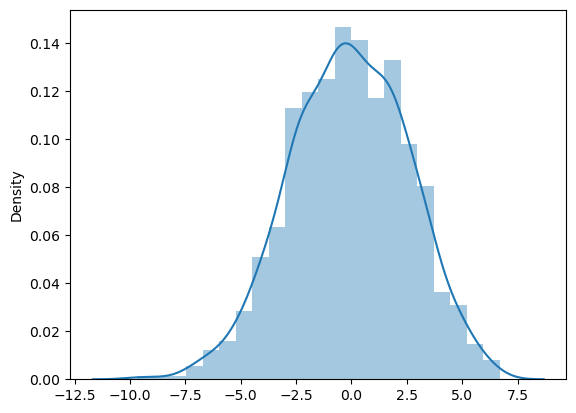

In [6]:
sns.distplot(sbp_diff)

In [7]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean       -0.099959
std         2.649770
min        -9.680556
25%        -1.938569
50%        -0.082808
75%         1.823145
max         6.687500
dtype: float64

The results shown above indicate that the mean systolic blood pressures calculated for two samples each with 100 people will typically differ by around 2.7 mm/Hg (the standard deviation), and will rarely differ by more than 5 mm/Hg.

The sample size is a major determinant of the chance fluctuations in any statistic.  Above we used samples of size 100, below we perform the same analysis using samples of size 400. 

count    1000.000000
mean        0.073525
std         1.312039
min        -3.761626
25%        -0.795118
50%         0.081499
75%         0.895631
max         4.329746
dtype: float64

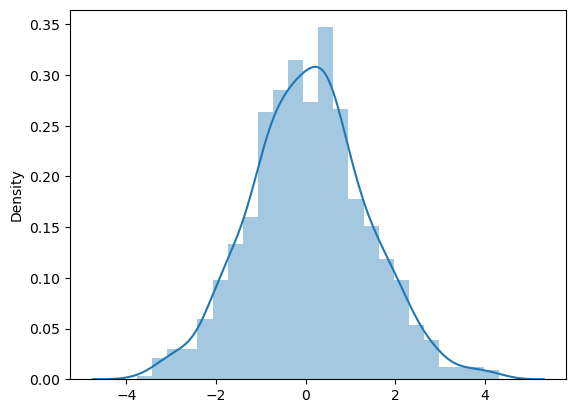

In [8]:
m = 400
sbp_diff = []

for i in range(1000):
    dx = da.sample(2*m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())
    
sns.distplot(sbp_diff)
pd.Series(sbp_diff).describe()

We see that with samples of size 400, the standard deviation is around 1.3, which is close to half of what it was when we used samples of size 100.  The smaller standard deviation indicates that the chance flucatations in the mean systolic blood pressure are smaller when we have a larger sample size.  This implies that we are able to estimate the population mean systolic blood pressure with more precision when we have samples of size 400 compared to when we have samples of size 100.

Importantly, increasing the sample size by a factor of 4 (from 100 to 400) led to a reduction of the standard deviation by a factor of 2.  This scaling behavior is very common in statistics -- increasing the sample size by a factor of K leads to a reduction in the standard deviation by a factor of sqrt(K).  Thus, for a factor of 4 increase in the sample size we see a factor of 2 reduction in standard deviation.  Similarly, for a factor of 9 increase in the sample size we would typically see a factor of 3 reduction in the standard deviation.

count    1000.000000
mean       -0.048205
std         1.123879
min        -3.174700
25%        -0.842342
50%        -0.019148
75%         0.710060
max         3.638938
dtype: float64

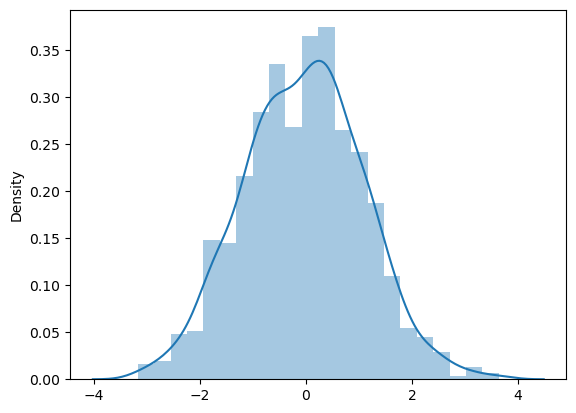

In [9]:
# Custom test with 600 samples
m = 600
sbp_diff = []

for i in range(1000):
    dx = da.sample(2*m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())
    
sns.distplot(sbp_diff)
pd.Series(sbp_diff).describe()

### Sampling distribution of the correlation coefficient

As discussed in the lectures, many statistics that are more complex than the sample mean behave similarly to the mean in terms of their sampling behavior.  Below we modify the subsampling analysis from above to consider the Pearson correlation coefficient between systolic and diastolic blood pressure.  Note that the standard deviation still drops by approximately a factor of 2 when the sample size increases by a factor of four (from 100 to 400).

This short Python program uses nested `for` loops.  The outer loop manages the sample size, and the inner loop obtains 1000 subsamples at a given sample size, calculates correlation coefficients for two subsamples, and records their difference.

In [20]:
for m in 100, 400:
    sbp_diff = []
    for i in range(1000):
        dx = da.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = np.corrcoef(dx1.loc[:, ['BPXSY1','BPXDI1']].dropna().T)
        r2 = np.corrcoef(dx2.loc[:, ['BPXSY1','BPXDI1']].dropna().T)
        sbp_diff.append(r1 - r2)
    print("m=%d" % m, np.std(sbp_diff), np.sqrt(2/m))

m=100 0.1273684787206315 0.1414213562373095
m=400 0.06652674422299092 0.07071067811865475


In [17]:
dx1.loc[:, ['BPXSY1','BPXDI1']].dropna().T

5125   4069   4242   5153   1708   2545   1888   1829   1709   1035  \
BPXSY1  166.0  128.0  170.0  122.0  120.0  114.0  130.0  106.0  160.0  176.0   
BPXDI1   54.0   72.0   92.0   68.0   80.0   76.0   68.0   74.0  100.0   50.0   

        ...   2690   3085   3842   3903   3491   5180   1109   644    4644  \
BPXSY1  ...  118.0  118.0  126.0  136.0  106.0  124.0  124.0  116.0  110.0   
BPXDI1  ...   76.0   86.0   78.0   86.0   68.0   76.0   72.0   76.0   78.0   

         1652  
BPXSY1  114.0  
BPXDI1   64.0  

[2 rows x 95 columns]

In [24]:
r1, r2

(array([[1.        , 0.37785917],
        [0.37785917, 1.        ]]),
 array([[1.        , 0.33097017],
        [0.33097017, 1.        ]]))

In [26]:
sbp_diff[0:3]

[array([[ 0.00000000e+00, -2.84743374e-02],
        [-2.84743374e-02,  1.11022302e-16]]),
 array([[ 0.00000000e+00,  6.22689167e-02],
        [ 6.22689167e-02, -1.11022302e-16]]),
 array([[ 0.        , -0.05700681],
        [-0.05700681,  0.        ]])]

The simulation above shows that when the subsample size increases from 100 to 400 (a factor of 4), the standard deviation of the difference between two correlation coefficients decreases by roughly a factor of 2.  The mathematical expression sqrt(2 / m) is an approximation to this standard deviation that can be computed without access to any data. 

### The shape of sampling distributions
Above we focused on the magnitude of the difference between a statistic calculated on two independent samples from a population.  Here we focus instead on the shape of the distribution of statistics calculated on subsamples.  As discussed in the lectures, the central limit theorem implies that many (but not all) statistics have approximately normal sampling distributions, even if the underlying data are not close to being normally distributed.

We will illustrate this phenomenon using the systolic blood pressure data from the NHANES study.  First we use a histogram to look at the distribution of individual systolic blood pressure values.  Note that it is somewhat right-skewed.

<Axes: xlabel='BPXSY1', ylabel='Density'>

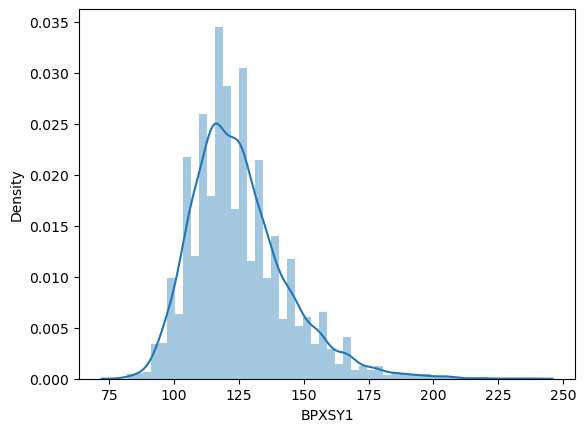

In [27]:
sns.distplot(da.BPXSY1.dropna())

Next we calculate 1000 sample means from 1000 subsamples of size 50 and inspect their distribution.

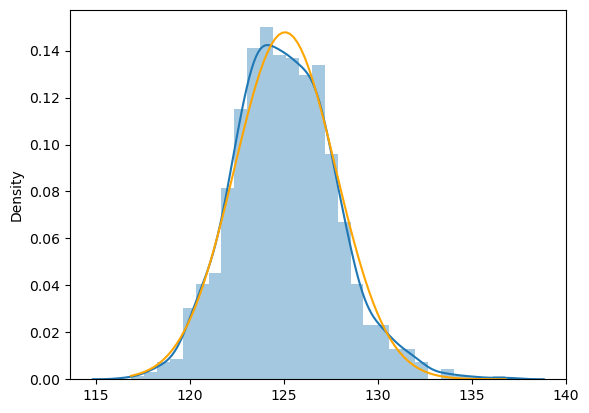

In [30]:
m = 50
sbp_mean = []
for i in range(1000):
    dx = da.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
sns.distplot(sbp_mean)
# The lines below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
y = norm.pdf(x=x, loc=np.mean(sbp_mean), scale=np.std(sbp_mean))
# loc specifies "means" and scale specifies "standard deviation"
plt.plot(x, y, color='orange')

The plots above show that while the distribution of individual systolic blood pressure measures is somewhat skewed to the right, the distribution of means of size 50 is approximately symmetric.  The distribution of means is also approximately normal, as shown by the orange curve, which is the best-fitting normal approximation to the data.